In [4]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

2023-10-02 21:15:42.478574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 21:15:46.784153: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-02 21:15:46.784258: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-02 21:15:47.220043: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-02 21:15:57.420188: W tensorflow/stream_executor/platform/de

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [39]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [40]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [41]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [42]:
inpx = Input(shape=(28,28,1))
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

In [43]:
model = Model([inpx], layer7)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=6, batch_size=500)

Epoch 1/6
120/120 [==============================] - 117s 958ms/step - loss: 0.5080 - accuracy: 0.8517
Epoch 2/6
120/120 [==============================] - 112s 930ms/step - loss: 0.1307 - accuracy: 0.9638
Epoch 3/6
120/120 [==============================] - 117s 978ms/step - loss: 0.0874 - accuracy: 0.9751
Epoch 4/6
120/120 [==============================] - 110s 915ms/step - loss: 0.0665 - accuracy: 0.9808
Epoch 5/6
120/120 [==============================] - 110s 917ms/step - loss: 0.0560 - accuracy: 0.9841
Epoch 6/6
120/120 [==============================] - 116s 964ms/step - loss: 0.0487 - accuracy: 0.9857


In [44]:
loss, accuracy = model.evaluate(x_test,y_test,verbose=0)
print(loss, accuracy)

0.03506316617131233 0.9889000058174133


In [45]:
import cv2
import matplotlib.pyplot as plt

In [52]:
img = cv2.imread("2.png",cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(28,28))
img = img/255.0
img = img.reshape(1,28,28,1)

In [53]:
pred = model.predict(img)
digit = np.argmax(pred)
print(f"Digit is {digit}")

1/1 [==============================] - 0s 41ms/step
Digit is 3


<BarContainer object of 10 artists>

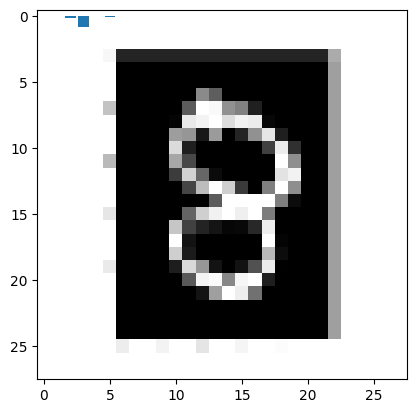

In [54]:
plt.imshow(img.reshape(28,28),cmap='gray',vmin=0,vmax=1)
plt.bar(range(10),pred[0])